# ACTUALIZACIÓN DE MERCADO

## LIBRERÍAS

### ***Instalaciones***

In [1]:
!locale
!sudo apt-get install language-pack-es
!sudo dpkg-reconfigure locales

"locale" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
!pip install matplotlib python-pptx

     ---------------------------------------- 10.1/10.1 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470950 sha256=4e1f208a99b4da8e591501f789a993420f55980a28ee8bf6f40068cef455d0cb
  Stored in directory: c:\users\javie\appdata\local\pip\cache\wheels\0e\4a\ed\9653bc799915f52dce3f04d14946fbd85cce9c3cdedc9cfa71
Successfully built python-pptx


### ***Importaciones***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
from datetime import datetime, timedelta
from tabulate import tabulate
from pptx import Presentation
from pptx.util import Inches
from matplotlib.gridspec import GridSpec

In [4]:
usuario = input("Ingrese su nombre de usuario: ")

In [5]:
ruta1 = r"C:\Users\{}\OneDrive - Beka Finance\Actualizacion mercados".format(usuario)
ruta2 = r"C:\Users\{}\OneDrive - Beka Finance\Actualizacion mercados\Graphs".format(usuario)

## DATA

In [6]:
# Ruta del archivo Excel
archivo_excel = ruta1 + '\\'+"Market Update - New Data.xlsx"

# Leer el archivo Excel y obtener las hojas
xls = pd.ExcelFile(archivo_excel)
hojas = xls.sheet_names

# Crear un diccionario para almacenar las tablas
tablas = {}

# Definir la estructura de las tablas que queremos crear
estructura_tablas = {
    "Dates": ["Dates","Dates"],
    "CTESP5Y Govt": ["CTESP5Y Govt", 'Columna1'],
    "GTESP10Y Govt": ["GTESP10Y Govt", 'Columna1.1'],
    "EUSA3 Curncy": ["EUSA3 Curncy", 'Columna1.2'],
    "EUSA5 Curncy": ["EUSA5 Curncy", 'Columna1.3'],
    "EUR006M Index": ["EUR006M Index", 'Columna1.4'],
    "EUR012M Index": ["EUR012M Index", 'Columna1.5'],
    'ITRX XOVER CDSI GEN 5Y Corp': ['ITRX XOVER CDSI GEN 5Y Corp', 'Columna1.6'],
    'GTESP3Y Govt': ['GTESP3Y Govt', 'Columna1.7'],
    'GTDEM10Y Govt': ['GTDEM10Y Govt', 'Columna1.8'],
}

# Recorrer cada hoja y crear las tablas asociadas en el diccionario
for hoja in hojas:
    tabla = pd.read_excel(xls, hoja)
    for nombre_tabla, columnas in estructura_tablas.items():
        # Verificar si los nombres de las columnas existen en el DataFrame
        if all(col in tabla.columns for col in columnas):
            # Seleccionar las columnas específicas para cada tabla utilizando 'iloc'
            df_tabla = tabla[columnas]
            # Renombrar las columnas del DataFrame
            df_tabla.columns = ['Date', nombre_tabla]
            # Eliminar valores NaN y duplicados
            df_tabla = df_tabla.dropna().drop_duplicates()
            # Almacenar el DataFrame resultante en el diccionario
            tablas[nombre_tabla] = df_tabla
        else:
            print(f"Columnas '{columnas}' no encontradas en la hoja '{hoja}'.")


## **Bonos soberanos**

### 1. ***SPGB 3-yr***

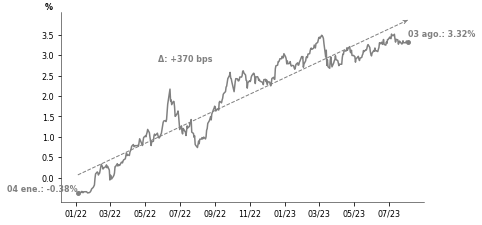

In [7]:
# Cargar la tabla "GTESP3Y Govt" del diccionario 'tablas'
dataset = tablas["GTESP3Y Govt"]

# Preparar el DataFrame dataset
dataset['Date'] = pd.to_datetime(dataset['Date'])
plt.figure(figsize=(6.5, 3.5))
c = "gray"
column_name = dataset.columns[1]
f=8

# DATASET
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita
# Establecer el idioma de las fechas en español
plt.rcParams['date.autoformatter.year'] = '%y'
plt.rcParams['date.autoformatter.month'] = '%b'
plt.rcParams['date.autoformatter.day'] = '%d'

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b')
last_date_str = last_value['Date'].strftime('%d %b')
plt.text(first_value['Date'], first_value[column_name], f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=2)

# Etiquetas y título del gráfico
plt.yticks(np.arange(0, dataset[column_name].max() , 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"spgb3.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 2. ***SPGB 5-yr***

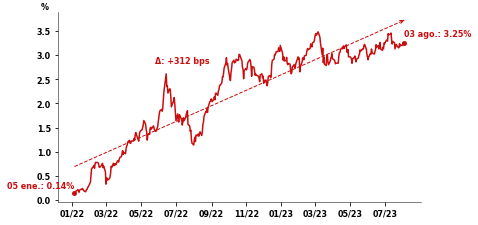

In [8]:
# Cargar la tabla "GTESP3Y Govt" del diccionario 'tablas'
dataset = tablas["CTESP5Y Govt"]

# Preparar el DataFrame dataset
dataset['Date'] = pd.to_datetime(dataset['Date'])
plt.figure(figsize=(6.5, 3.5))
c = "#CB0D0D"
column_name = dataset.columns[1]
f=8

# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita



# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]+0.05, f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=2)

# Etiquetas y título del gráfico
plt.yticks(np.arange(0, dataset[column_name].max() + 0.5, 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(1, 2) # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"spgb5.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 3. ***Evolución del bono español (SPGB) y bono alemán (DBR) a 10 años***

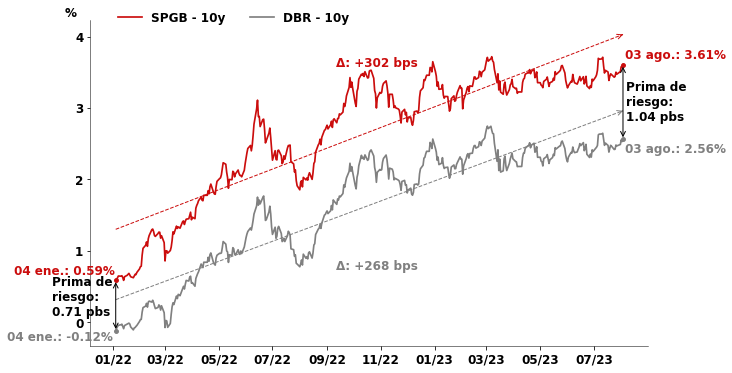

In [9]:
# Copiar las columnas necesarias
dataset = pd.DataFrame({
    'Dates': tablas['GTESP10Y Govt']['Date'],
    'CTESP10Y Govt': tablas['GTESP10Y Govt']['GTESP10Y Govt'],
    'CTDEM10Y Govt': tablas['GTDEM10Y Govt']['GTDEM10Y Govt']
})

# Convertir la columna 'Dates' en el DataFrame 'dataset' al formato de fecha
dataset['Dates'] = pd.to_datetime(dataset['Dates'])

# Eliminar filas con valores faltantes
dataset = dataset.dropna()

# Ordenar los datos por la columna 'Dates'
dataset = dataset.sort_values(by='Dates')

# Tamaño de fuente y color para el gráfico
f = 12
c = '#CB0D0D'

# Crear la figura con un tamaño personalizado
fig, ax = plt.subplots(figsize=(10, 6))

# Formato de fechas en el eje x
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Tipo de fuente
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = f
plt.rcParams['font.weight'] = 'bold'

# Leyenda
ax.plot(dataset['Dates'], dataset['CTESP10Y Govt'], color='#CB0D0D', label='SPGB - 10y', linewidth=1.7)
ax.plot(dataset['Dates'], dataset['CTDEM10Y Govt'], color='gray', label='DBR - 10y', linewidth=1.7)
legend_x = 0.03
legend_y = 1.058
ax.legend(loc='upper left', bbox_to_anchor=(legend_x, legend_y), frameon=False, ncol=2)

# Etiquetas primer y último valor para SPGB
plt.scatter(dataset['Dates'].iloc[0], dataset['CTESP10Y Govt'].iloc[0], color='#CB0D0D', label='Primer valor', s=15)
plt.scatter(dataset['Dates'].iloc[-1], dataset['CTESP10Y Govt'].iloc[-1], color='#CB0D0D', label='Último valor', s=15)

# Mostrar la fecha y el valor en los puntos del primer y último valor para SPGB
first_value = dataset.iloc[0]
last_value = dataset.iloc[-1]
first_date_str = first_value['Dates'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()

if pd.notnull(last_value['Dates']):
    last_date_str = last_value['Dates'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
else:
    last_date_str = ''

plt.text(first_value['Dates']+ pd.DateOffset(days=-1), first_value['CTESP10Y Govt']+0.03, f"{first_date_str}: {first_value['CTESP10Y Govt']:.2f}%", ha='right', va='bottom',color='#CB0D0D', fontsize=f, fontweight='bold')
plt.text(last_value['Dates']+ pd.DateOffset(days=2), last_value['CTESP10Y Govt']+0.04, f"{last_date_str}: {last_value['CTESP10Y Govt']:.2f}%", ha='left', va='bottom',color='#CB0D0D', fontsize=f,fontweight='bold')

# Incremento para SPGB
first_day_value = dataset['CTESP10Y Govt'].iloc[0]
last_day_value = dataset['CTESP10Y Govt'].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Dates'].iloc[0]+ pd.DateOffset(days=250), dataset['CTESP10Y Govt'].max(), increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# Línea de tendencia para SPGB
x = mdates.date2num(dataset['Dates'])
y = dataset['CTESP10Y Govt']
coef = np.polyfit(x, y, 1)
trendline = np.poly1d(coef)
plt.plot(dataset['Dates'], trendline(x), linestyle='dashed', color='#CB0D0D', linewidth=1, label='Línea de tendencia')
x_end = mdates.date2num(dataset['Dates'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]
arrow_length = 0.5
arrow_tail_length = 0.5
dx = arrow_length
dy = slope * dx
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color='#CB0D0D', linewidth=1)

# Ajustes en los ejes y etiquetas
date_format = mdates.DateFormatter('%m/%y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.ylabel('%', fontsize=f, fontweight='bold', rotation=0, ha='right')
plt.gca().yaxis.set_label_coords(-0.025, 1)
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(1, 2)

# BONO ALEMÁN
# Mostrar la fecha y el valor en los puntos del primer y último valor para BONO ALEMÁN (CTDEM10Y Govt)
first_value2 = dataset.iloc[0]
last_value2 = dataset.iloc[-1]
first_date2_str = first_value2['Dates'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()

if pd.notnull(last_value2['Dates']):
    last_date2_str = last_value2['Dates'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
else:
    last_date2_str = ''

plt.text(first_value2['Dates']+ pd.DateOffset(days=-3), first_value2['CTDEM10Y Govt'], f"{first_date2_str}: {first_value2['CTDEM10Y Govt']:.2f}%", ha='right', va='top',color='gray', fontsize=f, fontweight='bold')
plt.text(last_value2['Dates']+ pd.DateOffset(days=2), last_value2['CTDEM10Y Govt']-0.04, f"{last_date2_str}: {last_value2['CTDEM10Y Govt']:.2f}%", ha='left', va='top',color='gray', fontsize=f, fontweight='bold')

plt.scatter(dataset['Dates'].iloc[0], dataset['CTDEM10Y Govt'].iloc[0], color='gray', label='Primer valor', s=15)
plt.scatter(dataset['Dates'].iloc[-1], dataset['CTDEM10Y Govt'].iloc[-1], color='gray', label='Último valor', s=15)

# Línea de tendencia para BONO ALEMÁN (CTDEM10Y Govt)
y2 = dataset['CTDEM10Y Govt']
coef2 = np.polyfit(x, y2, 1)
trendline2 = np.poly1d(coef2)
plt.plot(dataset['Dates'], trendline2(x), linestyle='dashed', color='gray', linewidth=1, label='Línea de tendencia (CTDEM10Y Govt)')
x2_end = mdates.date2num(dataset['Dates'].iloc[-1])
y2_end = trendline2(x)[-1]
slope2 = coef2[0]
arrow_length = 0.5
arrow_tail_length = 0.5
dx2 = arrow_length
dy2 = slope2 * dx
plt.annotate('', xy=(x2_end, y2_end), xytext=(x2_end - dx2, y2_end - dy2), arrowprops=dict(arrowstyle='->', color='gray'))
plt.plot(x2_end - dx2, y2_end - dy2 - arrow_tail_length, color='gray', linewidth=1)

# Incremento para BONO ALEMÁN (CTDEM10Y Govt)
first_day_value2 = dataset['CTDEM10Y Govt'].iloc[0]
last_day_value2 = dataset['CTDEM10Y Govt'].iloc[-1]
increment2 = last_day_value2 - first_day_value2
increment_percentage2 = increment2 * 100
increment_text2 = f"Δ: {'+' if increment2 >= 0 else '-'}{abs(increment_percentage2):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Dates'].iloc[0]+ pd.DateOffset(days=250), dataset['CTDEM10Y Govt'].min()+1, increment_text2, ha='left', va='top', color="gray", fontsize=f, fontweight='bold')

# Flecha en el extremo de la línea entre SPGB y BONO ALEMÁN
ax.annotate('', xy=(dataset['Dates'].iloc[0], first_day_value), xytext=(dataset['Dates'].iloc[0], first_day_value2),
            arrowprops=dict(arrowstyle='<->', color='black'))
# Etiqueta de la diferencia entre SPGB y BONO ALEMÁN
difference = first_day_value - first_day_value2
label_text = f"Prima de\nriesgo:\n{difference:.2f} pbs"
# Calcular posición media entre SPGB y BONO ALEMÁN
x_position = dataset['Dates'].iloc[0] + pd.DateOffset(days=-72)
y_position = (first_day_value + first_day_value2) / 2 +0.12
ax.text(x_position, y_position, label_text, ha='left', va='center', color='black', fontsize=f, fontweight='bold')


ax.annotate('', xy=(dataset['Dates'].iloc[-1], last_day_value), xytext=(dataset['Dates'].iloc[-1], last_day_value2),
            arrowprops=dict(arrowstyle='<->', color='black'))
# Etiqueta de la diferencia entre SPGB y BONO ALEMÁN
difference2 = last_day_value - last_day_value2
label_text2 = f"Prima de\nriesgo:\n{difference2:.2f} pbs"
# Calcular posición media entre SPGB y BONO ALEMÁN
x2_position = dataset['Dates'].iloc[-1] + pd.DateOffset(days=3)
y2_position = ((last_day_value + last_day_value2) / 2)
ax.text(x2_position, y2_position, label_text2, ha='left', va='center', color='black', fontsize=f, fontweight='bold')


# Quitar el cuadro alrededor del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
color_linea_eje = 'black'  # Cambiar el color de las líneas de los ejes a negro
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['bottom'].set_color(color_linea_eje)  # Cambiar el color de la línea del eje x a negro
ax.spines['left'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_color(color_linea_eje)  # Cambiar el color de la línea del eje y a negro

# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"spgb_dbr.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


### ***PPT***

In [10]:
from pptx import Presentation

def delete_all_images_from_slide(slide):
    for shape in slide.shapes:
        if shape.shape_type == 13:  # El número 13 representa el tipo de forma de una imagen en PowerPoint
            slide.shapes._spTree.remove(shape._element)

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[1]  # Suponiendo que la segunda diapositiva es la de índice 1

# Eliminar todas las imágenes de la diapositiva
delete_all_images_from_slide(slide)

# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")

In [11]:
from pptx import Presentation
from pptx.util import Inches

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[1]  # Suponiendo que la segunda diapositiva es la de índice 1

# Insertar la primera imagen (bonos1.png) en la esquina superior izquierda
img_path1 = ruta2 + '\\'+"spgb3.png"
left1 = Inches(-0.055)
top1 = Inches(1.25)
width1 = Inches(5.5314961)
height1 = Inches(2.63779528)
slide.shapes.add_picture(img_path1, left1, top1, width=width1, height=height1)

# Insertar la segunda imagen (bonos2.png) en la esquina inferior izquierda
img_path2 = ruta2 + '\\'+"spgb5.png"
left2 = Inches(-0.058)
top2 = Inches(4.25)
width2 = Inches(5.5314961)
height2 = Inches(2.63779528)
slide.shapes.add_picture(img_path2, left2, top2, width=width2, height=height2)

# Insertar la tercera imagen (bonos3.png) en la esquina superior derecha
img_path3 = ruta2 + '\\'+"spgb_dbr.png"
left3 = Inches(5.4)
top3 = Inches(1.25)
width3 = Inches(5.3267717)
height3 = Inches(2.61811)
slide.shapes.add_picture(img_path3, left3, top3, width=width3, height=height3)

# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")


## **Tipos de interés**

### 1. ***Swap 3-yr***

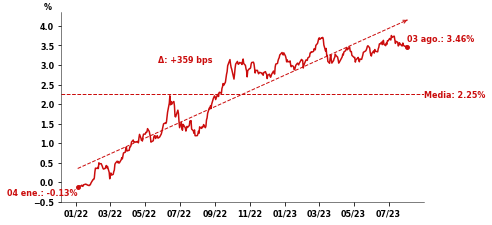

In [12]:
plt.figure(figsize=(6.5, 3.5))
dataset = tablas["EUSA3 Curncy"]
c = "#CB0D0D"
column_name = dataset.columns[1]
f=8

# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita

# LÍNEA DE MEDIA
mean_value = dataset[column_name].mean()
# Agregar la etiqueta a la derecha de la línea de la media
plt.text(dataset['Date'].max()+ pd.DateOffset(days=29), mean_value, f'Media: {mean_value:.2f}%', ha='left', va='center', color=c, fontsize=f, fontweight='bold')
# Dibujar la línea discontinua que marca la media
plt.axhline(mean_value, color=c, linestyle='dashed', linewidth=1, label='Media')  # Aumentar el grosor de la línea

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]-0.25, f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=1)

# Etiquetas y título del gráfico
plt.yticks(np.arange(-0.5, dataset[column_name].max() + 0.5, 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"swap3.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 2. ***Swap 5-yr***

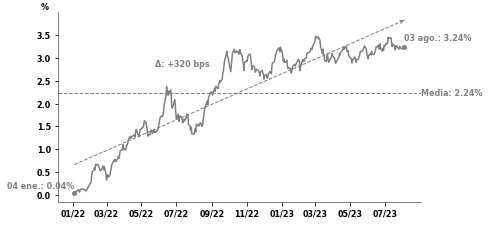

In [13]:
plt.figure(figsize=(6.5, 3.5))
dataset = tablas["EUSA5 Curncy"]
c = "gray"
column_name = dataset.columns[1]
f=8

# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita

# LÍNEA DE MEDIA
mean_value = dataset[column_name].mean()
# Agregar la etiqueta a la derecha de la línea de la media
plt.text(dataset['Date'].max()+ pd.DateOffset(days=29), mean_value, f'Media: {mean_value:.2f}%', ha='left', va='center', color=c, fontsize=f, fontweight='bold')
# Dibujar la línea discontinua que marca la media
plt.axhline(mean_value, color=c, linestyle='dashed', linewidth=1, label='Media')  # Aumentar el grosor de la línea

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]+0.05, f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=1)

# Etiquetas y título del gráfico
plt.yticks(np.arange(0, dataset[column_name].max() + 0.5, 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"swap5.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 3. ***Euribor 6 meses***

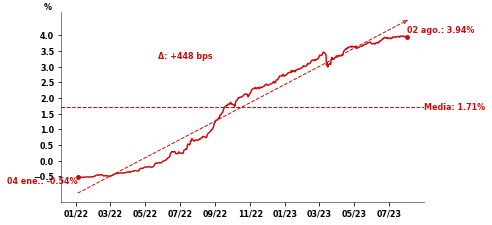

In [14]:
plt.figure(figsize=(6.5, 3.5))
dataset = tablas["EUR006M Index"]
c = "#CB0D0D"
column_name = dataset.columns[1]
f=8

# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] ='DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita

# LÍNEA DE MEDIA
mean_value = dataset[column_name].mean()
# Agregar la etiqueta a la derecha de la línea de la media
plt.text(dataset['Date'].max()+ pd.DateOffset(days=29), mean_value, f'Media: {mean_value:.2f}%', ha='left', va='center', color=c, fontsize=f, fontweight='bold')
# Dibujar la línea discontinua que marca la media
plt.axhline(mean_value, color=c, linestyle='dashed', linewidth=1, label='Media')  # Aumentar el grosor de la línea

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]-0.25, f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=1)

# Etiquetas y título del gráfico
plt.yticks(np.arange(-0.5, dataset[column_name].max() + 0.5, 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"euribor6.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 4. ***Euribor 12 meses***

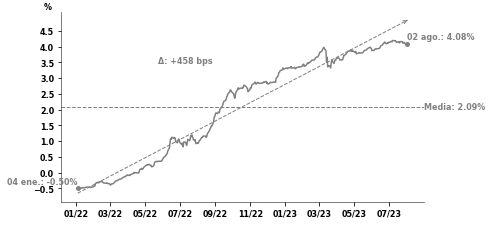

In [16]:
plt.figure(figsize=(6.5, 3.5))
dataset = tablas["EUR012M Index"]
c = "gray"
column_name = dataset.columns[1]
f=8

# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita

# LÍNEA DE MEDIA
mean_value = dataset[column_name].mean()
# Agregar la etiqueta a la derecha de la línea de la media
plt.text(dataset['Date'].max()+ pd.DateOffset(days=29), mean_value, f'Media: {mean_value:.2f}%', ha='left', va='center', color=c, fontsize=f, fontweight='bold')
# Dibujar la línea discontinua que marca la media
plt.axhline(mean_value, color=c, linestyle='dashed', linewidth=1, label='Media')  # Aumentar el grosor de la línea

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]+0.05, f"{first_date_str}: {first_value[column_name]:.2f}%", ha='right', va='bottom',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+0.1, f"{last_date_str}: {last_value[column_name]:.2f}%", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment * 100
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=1)

# Etiquetas y título del gráfico
plt.yticks(np.arange(-0.5, dataset[column_name].max() + 0.5, 0.5))
plt.ylabel('%', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
plt.yticks(fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"euribor12.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### **PPT**

In [17]:
from pptx import Presentation

def delete_all_images_from_slide(slide):
    for shape in slide.shapes:
        if shape.shape_type == 13:  # El número 13 representa el tipo de forma de una imagen en PowerPoint
            slide.shapes._spTree.remove(shape._element)

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[2]  # Suponiendo que la segunda diapositiva es la de índice 1

# Eliminar todas las imágenes de la diapositiva
delete_all_images_from_slide(slide)

# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")

In [18]:
from pptx import Presentation
from pptx.util import Inches

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[2]  # Suponiendo que la segunda diapositiva es la de índice 1

# Insertar la primera imagen (bonos1.png) en la esquina superior izquierda
img_path1 = ruta2 + '\\'+"swap3.png"
left1 = Inches(-0.055)
top1 = Inches(1.25)
width1 = Inches(5.5314961)
height1 = Inches(2.63779528)
slide.shapes.add_picture(img_path1, left1, top1, width=width1, height=height1)

# Insertar la segunda imagen (bonos2.png) en la esquina inferior izquierda
img_path2 =ruta2 + '\\'+"swap5.png"
left2 = Inches(-0.058)
top2 = Inches(4.25)
width2 = Inches(5.5314961)
height2 = Inches(2.63779528)
slide.shapes.add_picture(img_path2, left2, top2, width=width2, height=height2)

# Insertar la tercera imagen (bonos3.png) en la esquina superior derecha
img_path3 = ruta2 + '\\'+"euribor6.png"
left3 = Inches(5.4)
top3 = Inches(1.25)
width3 = Inches(5.3267717)
height3 = Inches(2.61811)
slide.shapes.add_picture(img_path3, left3, top3, width=width3, height=height3)

# Insertar la segunda imagen (bonos2.png) en la esquina inferior izquierda
img_path4 =ruta2 + '\\'+"euribor12.png"
left4 = Inches(5.4)
top4 = Inches(4.25)
width4= Inches(5.3267717)
height4 = Inches(2.61811)
slide.shapes.add_picture(img_path4, left4, top4, width=width4, height=height4)

# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")

## **Índice de crédito y variaciones**

### 1. ***Evolución del Itraxx Crossover Europe***

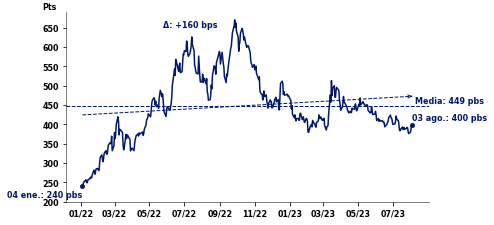

In [19]:
dataset = tablas['ITRX XOVER CDSI GEN 5Y Corp']
c = "#001968"
e = '#CB0D0D'
column_name = dataset.columns[1]
f=8
plt.figure(figsize=(6.5, 3.5))
# DATASET
dataset['Date'] = pd.to_datetime(dataset['Date'])
grouped_dataset = dataset.groupby('Date')[column_name].mean().reset_index()
plt.plot(grouped_dataset['Date'], grouped_dataset[column_name], color=c, linewidth=1.5)  # Aumentar el grosor de la línea

# EJE X
date_format = mdates.DateFormatter('%m/%y')  # Formato de fecha personalizado
plt.gca().xaxis.set_major_formatter(date_format)  # Aplicar el formato personalizado
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Ajusta el número de marcas en el eje x automáticamente

# TIPO DE FUENTE
plt.rcParams['font.family'] = 'DejaVu Sans'  # Cambiar el tipo de letra
plt.rcParams['font.size'] = f  # Cambiar el tamaño de la fuente
plt.rcParams['font.weight'] = 'bold'  # Cambiar a negrita

# MEDIA
max_date = dataset['Date'].max()
mean_value = dataset[column_name].mean()
# Aumentar el valor de la coordenada x para mover la etiqueta más a la derecha
x_offset = pd.DateOffset(months=1)  # Ajustar el valor según tus necesidades
# Calcular la nueva posición x
new_x = max_date + x_offset
# Mover la etiqueta de la media más a la derecha
plt.text(new_x+ pd.DateOffset(days=35), mean_value, f'Media: {mean_value:.0f} pbs', ha='center', va='bottom', color=c, fontsize=f, fontweight='bold')
# Dibujar la línea discontinua que marca la media
plt.axhline(mean_value, color=c, linestyle='dashed', linewidth=1, label='Media')  # Aumentar el grosor de la línea

# ETIQUETAS PRIMER Y ULTIMO VALOR
plt.scatter(grouped_dataset['Date'].iloc[0], grouped_dataset[column_name].iloc[0], color=c, label='Primer valor', s=15)
plt.scatter(grouped_dataset['Date'].iloc[-1], grouped_dataset[column_name].iloc[-1], color=c, label='Último valor', s=15)
# Mostrar la fecha y el valor en los puntos del primer y último valor
first_value = grouped_dataset.iloc[0]
last_value = grouped_dataset.iloc[-1]
first_date_str = first_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
last_date_str = last_value['Date'].strftime('%d %b').encode(locale.getpreferredencoding()).decode()
plt.text(first_value['Date'], first_value[column_name]-9, f"{first_date_str}: {first_value[column_name]:.0f} pbs", ha='right', va='top',color=c, fontsize=f, fontweight='bold')
plt.text(last_value['Date'], last_value[column_name]+5, f"{last_date_str}: {last_value[column_name]:.0f} pbs", ha='left', va='bottom',color=c, fontsize=f,fontweight='bold')

# INCREMENTO
first_day_value = grouped_dataset[column_name].iloc[0]
last_day_value = grouped_dataset[column_name].iloc[-1]
increment = last_day_value - first_day_value
increment_percentage = increment
increment_text = f"Δ: {'+' if increment >= 0 else '-'}{abs(increment_percentage):.0f} bps"
# Mostrar el incremento en el gráfico
plt.text(dataset['Date'].min()+ pd.DateOffset(days=140), dataset[column_name].max() - 0.5, increment_text, ha='left', va='top', color=c, fontsize=f, fontweight='bold')

# LÍNEA DE TENDENCIA
x = mdates.date2num(grouped_dataset['Date'])  # Convertir las fechas a números
y = grouped_dataset[column_name]
coef = np.polyfit(x, y, 1)  # Ajustar una línea de regresión lineal de grado 1
trendline = np.poly1d(coef)  # Crear una función para la línea de tendencia
plt.plot(grouped_dataset['Date'], trendline(x), linestyle='dashed', color=c, linewidth=1, label='Línea de tendencia')  # Aumentar el grosor de la línea
# Calcular las coordenadas para la flecha
x_end = mdates.date2num(grouped_dataset['Date'].iloc[-1])
y_end = trendline(x)[-1]
slope = coef[0]  # Pendiente de la línea de tendencia
arrow_length = 0.5  # Longitud de la flecha como fracción del eje y
arrow_tail_length = 0.5  # Longitud de la cola de la flecha como fracción del eje y
# Calcular el desplazamiento horizontal y vertical de la flecha
dx = arrow_length
dy = slope * dx
# Dibujar la flecha
plt.annotate('', xy=(x_end, y_end), xytext=(x_end - dx, y_end - dy), arrowprops=dict(arrowstyle='->', color=c))
plt.plot(x_end - dx, y_end - dy - arrow_tail_length, color=c, linewidth=1)

# Etiquetas y título del gráfico
plt.ylabel('Pts', fontsize=f, fontweight='bold',rotation=0, ha='right')  # Girar el ylabel en 90 grados
# Mover la etiqueta del eje y al principio del eje
plt.gca().yaxis.set_label_coords(-0.025, 1)
# Cambiar el tipo de fuente de los labels y los ejes
plt.xticks(fontsize=f, fontweight='bold')
# Cambiar los saltos de unidades en el eje y a 50 en 50, comenzando desde 200
plt.yticks(np.arange(200, dataset[column_name].max(), 50), fontsize=f, fontweight='bold')
plt.gca().xaxis.set_label_coords(0.5, -0.15)  # Ajustar la posición de la etiqueta del eje x

# Quitar el cuadro alrededor del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
grosor_linea_eje = 0.5
ax.spines['bottom'].set_linewidth(grosor_linea_eje)
ax.spines['left'].set_linewidth(grosor_linea_eje)

# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"itraxx.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### 2. ***Variación***

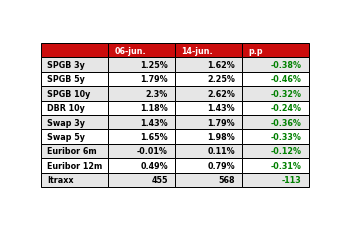

In [20]:
dataset = pd.DataFrame({
    'Dates': tablas['Dates']['Dates'],
    'CTESP5Y Govt': tablas['CTESP5Y Govt']['CTESP5Y Govt'],
    'CTESP10Y Govt': tablas['GTESP10Y Govt']['GTESP10Y Govt'],
    'EUSA3 Curncy': tablas['EUSA3 Curncy']['EUSA3 Curncy'],
    'EUSA5 Curncy': tablas['EUSA5 Curncy']['EUSA5 Curncy'],
    'EUR006M Index': tablas['EUR006M Index']['EUR006M Index'],
    'EUR012M Index': tablas['EUR012M Index']['EUR012M Index'],
    'ITRX XOVER CDSI GEN 5Y Corp': tablas['ITRX XOVER CDSI GEN 5Y Corp']['ITRX XOVER CDSI GEN 5Y Corp'],
    'CTESP3Y Govt': tablas['GTESP3Y Govt']['GTESP3Y Govt'],
    'CTDEM10Y Govt': tablas['GTDEM10Y Govt']['GTDEM10Y Govt'],
})

# Convertir la columna 'Dates' al formato de fecha
dataset['Dates'] = pd.to_datetime(dataset['Dates'])

# Eliminar filas con valores faltantes
dataset = dataset.dropna()

# Ordenar los datos por la columna 'Dates'
dataset = dataset.sort_values(by='Dates')

e = '#CB0D0D'
g = '#E6E6E6'
f = 8

# Convertir la columna 'Date' a tipo datetime
dataset['Dates'] = pd.to_datetime(dataset['Dates'])

# Obtener la última fecha en el DataFrame
last_date = dataset['Dates'].iloc[-1]

# Calcular date1 y date2
date1 = (last_date - timedelta(days=8)).strftime("%d-%b")
date2 = last_date.strftime("%d-%b")

CT3_1 = dataset['CTESP3Y Govt'].iloc[-7]
CT3_2 = dataset['CTESP3Y Govt'].iloc[-1]
CT5_1 = dataset['CTESP5Y Govt'].iloc[-7]
CT5_2 = dataset['CTESP5Y Govt'].iloc[-1]
CT10_1 = dataset['CTESP10Y Govt'].iloc[-7]
CT10_2 = dataset['CTESP10Y Govt'].iloc[-1]
CTDEM10_1 = dataset['CTDEM10Y Govt'].iloc[-7]
CTDEM10_2 = dataset['CTDEM10Y Govt'].iloc[-1]
EUSA3_1 = dataset['EUSA3 Curncy'].iloc[-7]
EUSA3_2 = dataset['EUSA3 Curncy'].iloc[-1]
EUSA5_1 = dataset['EUSA5 Curncy'].iloc[-7]
EUSA5_2 = dataset['EUSA5 Curncy'].iloc[-1]
EUR6_1 = dataset['EUR006M Index'].iloc[-7]
EUR6_2 = dataset['EUR006M Index'].iloc[-1]
EUR12_1 = dataset['EUR012M Index'].iloc[-7]
EUR12_2 = dataset['EUR012M Index'].iloc[-1]
ITRX_1 = dataset['ITRX XOVER CDSI GEN 5Y Corp'].iloc[-7]
ITRX_2 = dataset['ITRX XOVER CDSI GEN 5Y Corp'].iloc[-1]

# Crear un DataFrame auxiliar para las fechas
dates_dataset = pd.DataFrame({
    'Date': [date1, date2, 'p.p'],
    'SPGB 3y': [CT3_1, CT3_2, CT3_1 - CT3_2],
    'SPGB 5y': [CT5_1, CT5_2, CT5_1 - CT5_2],
    'SPGB 10y': [CT10_1, CT10_2, CT10_1 - CT10_2],
    'DBR 10y': [CTDEM10_1, CTDEM10_2, CTDEM10_1 - CTDEM10_2],
    'Swap 3y': [EUSA3_1, EUSA3_2, EUSA3_1 - EUSA3_2],
    'Swap 5y': [EUSA5_1, EUSA5_2, EUSA5_1 - EUSA5_2],
    'Euribor 6m': [EUR6_1, EUR6_2, EUR6_1 - EUR6_2],
    'Euribor 12m': [EUR12_1, EUR12_2, EUR12_1 - EUR12_2],
    'Itraxx': [ITRX_1, ITRX_2, ITRX_1 - ITRX_2],
})

# Formatear los valores con 2 decimales y un signo de "%" al final
for column in dates_dataset.columns[1:9]:
    dates_dataset[column] = dates_dataset[column].apply(lambda x: f"{round(x, 2)}%")

for column in dates_dataset.columns[9:]:
    dates_dataset[column] = dates_dataset[column].apply(lambda x: f"{round(x)}")

# Concatenar el DataFrame auxiliar con el DataFrame original
df = pd.DataFrame(dates_dataset)

# Transponer el DataFrame y reindexar
df = df.set_index('Date').T.reset_index()

# Dejar en blanco la primera celda del encabezado
df.columns.values[0] = ''

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Ocultar los ejes
ax.axis('off')

# Crear la tabla utilizando el método table de los ejes
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Establecer el formato de la tabla
table.auto_set_font_size(False)
table.set_fontsize(f)
table.scale(0.8, 1.2)
table[0, 0].set_facecolor(e)
table[0, 1].set_facecolor(e)
table[0, 2].set_facecolor(e)
table[0, 3].set_facecolor(e)
table[1, 0].set_facecolor(g)
table[1, 1].set_facecolor(g)
table[1, 2].set_facecolor(g)
table[1, 3].set_facecolor(g)
table[3, 0].set_facecolor(g)
table[3, 1].set_facecolor(g)
table[3, 2].set_facecolor(g)
table[3, 3].set_facecolor(g)
table[5, 0].set_facecolor(g)
table[5, 1].set_facecolor(g)
table[5, 2].set_facecolor(g)
table[5, 3].set_facecolor(g)
table[7, 0].set_facecolor(g)
table[7, 1].set_facecolor(g)
table[7, 2].set_facecolor(g)
table[7, 3].set_facecolor(g)
table[9, 0].set_facecolor(g)
table[9, 1].set_facecolor(g)
table[9, 2].set_facecolor(g)
table[9, 3].set_facecolor(g)
table[0, 1].get_text().set_color('white')
table[0, 2].get_text().set_color('white')
table[0, 3].get_text().set_color('white')
table[0, 1].get_text().set_fontweight('bold')
table[0, 2].get_text().set_fontweight('bold')
table[0, 3].get_text().set_fontweight('bold')


table[1,0].set_text_props(ha='left')
table[2,0].set_text_props(ha='left')
table[3,0].set_text_props(ha='left')
table[4,0].set_text_props(ha='left')
table[5,0].set_text_props(ha='left')
table[6,0].set_text_props(ha='left')
table[7,0].set_text_props(ha='left')
table[8,0].set_text_props(ha='left')
table[9,0].set_text_props(ha='left')

cell_1 = table[1, 3]
value_1 = float(cell_1.get_text().get_text().strip('%'))
if value_1 < 0:
    cell_1.get_text().set_color('green')
else:
    cell_1.get_text().set_color('red')
    cell_1.get_text().set_text(f"+{value_1}%")

cell_2 = table[2, 3]
value_2 = float(cell_2.get_text().get_text().strip('%'))
if value_2 < 0:
    cell_2.get_text().set_color('green')
else:
    cell_2.get_text().set_color('red')
    cell_2.get_text().set_text(f"+{value_2}%")

cell_3 = table[3, 3]
value_3 = float(cell_3.get_text().get_text().strip('%'))
if value_3 < 0:
    cell_3.get_text().set_color('green')
else:
    cell_3.get_text().set_color('red')
    cell_3.get_text().set_text(f"+{value_3}%")

cell_4 = table[4, 3]
value_4 = float(cell_4.get_text().get_text().strip('%'))
if value_4 < 0:
    cell_4.get_text().set_color('green')
else:
    cell_4.get_text().set_color('red')
    cell_4.get_text().set_text(f"+{value_4}%")

cell_5 = table[5, 3]
value_5 = float(cell_5.get_text().get_text().strip('%'))
if value_5 < 0:
    cell_5.get_text().set_color('green')
else:
    cell_5.get_text().set_color('red')
    cell_5.get_text().set_text(f"+{value_5}%")

cell_6 = table[6, 3]
value_6 = float(cell_6.get_text().get_text().strip('%'))
if value_6 < 0:
    cell_6.get_text().set_color('green')
else:
    cell_6.get_text().set_color('red')
    cell_6.get_text().set_text(f"+{value_6}%")

cell_7 = table[7, 3]
value_7 = float(cell_7.get_text().get_text().strip('%'))
if value_7 < 0:
    cell_7.get_text().set_color('green')
else:
    cell_7.get_text().set_color('red')
    cell_7.get_text().set_text(f"+{value_7}%")

cell_8 = table[8, 3]
value_8 = float(cell_8.get_text().get_text().strip('%'))
if value_8 < 0:
    cell_8.get_text().set_color('green')
else:
    cell_8.get_text().set_color('red')
    cell_8.get_text().set_text(f"+{value_8}%")

cell_9 = table[9, 3]
value_9 = float(cell_9.get_text().get_text().strip('%'))
if value_9 < 0:
    cell_9.get_text().set_color('green')
else:
    cell_9.get_text().set_color('red')
    cell_9.get_text().set_text(f"+{value_9}%")

# Establecer la alineación izquierda en la primera columna
for i in range(1, len(df.columns)):
    table[0, i].get_text().set_ha('left')



# Mostrar el gráfico
# Guardar la figura en un archivo de imagen
save_path = ruta2 + '\\'+"variaciones.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

### **PPT**

In [21]:
from pptx import Presentation

def delete_all_images_from_slide(slide):
    for shape in slide.shapes:
        if shape.shape_type == 13:  # El número 13 representa el tipo de forma de una imagen en PowerPoint
            slide.shapes._spTree.remove(shape._element)

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[3]  # Suponiendo que la segunda diapositiva es la de índice 1

# Eliminar todas las imágenes de la diapositiva
delete_all_images_from_slide(slide)

# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")

In [22]:
from pptx import Presentation
from pptx.util import Inches

# Cargar el PowerPoint existente
presentation = Presentation(ruta1 + '\\'+"Market Update.pptx")

# Obtener la segunda diapositiva
slide = presentation.slides[3]  # Suponiendo que la segunda diapositiva es la de índice 1

# Insertar la primera imagen (bonos1.png) en la esquina superior izquierda
img_path1 =ruta2 + '\\'+"itraxx.png"
left1 = Inches(-0.055)
top1 = Inches(1.25)
width1 = Inches(5.6141732)
height1 = Inches(2.692913)
slide.shapes.add_picture(img_path1, left1, top1, width=width1, height=height1)

# Insertar la tercera imagen (bonos3.png) en la esquina superior derecha
img_path3 = ruta2 + '\\'+"variaciones.png"
left3 = Inches(5.5)
top3 = Inches(1.25)
width3 = Inches(4.5)
height3 = Inches(2.61811)
slide.shapes.add_picture(img_path3, left3, top3, width=width3, height=height3)


# Guardar el PowerPoint actualizado
presentation.save(ruta1 + '\\'+"Market Update.pptx")